In [1]:
def make_roberto_plot (sample, axs):
    
    cumulative_rainfall, cumulative_rainfall_times = create_cumulative_event(sample)
    dimensionless_cumulative_rainfall, dimensionless_times =  create_dimensionless_event(cumulative_rainfall, cumulative_rainfall_times)
    interpolated_n_cumulative_rainfall, interpolated_n_times = interpolate_rainfall(dimensionless_cumulative_rainfall,n)
    interpolated_n_incremental_rainfall = create_incremental_event(interpolated_n_cumulative_rainfall)
    max_quintile_profile = find_part_with_most_rain(interpolated_n_incremental_rainfall, n)
    
    x_ticks = np.array(range(1, len(sample) + 1)) * 0.5  # [0.5, 1.0, 1.5]
    
    # 1. Raw Data Plot
    # axs[0].bar(range(len(sample), sample))
    axs[0].bar(np.array(range(1, len(sample)+1)) * 0.5, sample, color='royalblue', alpha=0.7, width=0.4)
    axs[0].set_xlabel('Time (hours) ', fontsize=15)
    axs[0].set_ylabel('Rainfall (mm)', fontsize=15)
    axs[0].set_xticks(x_ticks)
    axs[0].set_title('Raw rainfall (mm)', fontsize=20)
    
    # 2. Dimensionless Cumulative Values
    axs[1].plot(dimensionless_times, dimensionless_cumulative_rainfall, label='Cumulative Sum', linewidth=2, marker='o',
                color='royalblue', markerfacecolor='purple')
    axs[1].set_title('Dimensionless cumulative rainfall', fontsize=20)
    axs[1].set_xlabel('Dimensionless time', fontsize=15)
    axs[1].set_ylabel('Dimensionless cumulative rainfall, \n with linearly interpolated lines', fontsize=15)
    # axs[1].legend()
    axs[1].grid(False)
    # # Add step plot for the raw cumulative rainfall
    # axs[1].step(dimensionless_times, dimensionless_cumulative_rainfall, 
    #             label='Raw Data (Cumulative)', where='post', color='orange', linestyle='-')


    # 3. Interpolated Cumulative Values
    axs[2].plot(interpolated_n_times, interpolated_n_cumulative_rainfall, label='Cumulative Sum',linewidth=2,  marker='o', 
                color='royalblue', markerfacecolor='purple')
    # axs[2].set_title('Interpolated Cumulative')
    axs[2].set_xlabel('Dimensionless time', fontsize=15)
    axs[2].set_ylabel('Dimensionless cumulative rainfall', fontsize=15)
    axs[2].set_title('Dimensionless cumulative rainfall \n (int to len 5)', fontsize=20)
    axs[2].grid(False)

    # Call the function for the last subplot
    plot_incremental_rainfall(interpolated_n_incremental_rainfall, axs[3])

    for ax in axs:
        ax.tick_params(axis='both', labelsize=14)  # Adjust labelsize as needed
    
    # Show the final figure
    fig.text(-0.03, 0.50, 'RVH \n method', va='center', ha='center', fontsize=18, rotation='horizontal');
    plt.tight_layout()
    plt.show()
    
    
def make_d50_plot(sample, axs):

    cumulative_rainfall, cumulative_rainfall_times = create_cumulative_event(sample)
    dimensionless_cumulative_rainfall, dimensionless_times =  create_dimensionless_event(cumulative_rainfall, cumulative_rainfall_times)
    interpolated_n_cumulative_rainfall, interpolated_n_times = interpolate_rainfall(dimensionless_cumulative_rainfall,n)
    interpolated_n_incremental_rainfall = create_incremental_event(interpolated_n_cumulative_rainfall)
    max_quintile_profile = find_part_with_most_rain(interpolated_n_incremental_rainfall, n)
    
    x_ticks = np.array(range(1, len(sample) + 1)) * 0.5  # [0.5, 1.0, 1.5]
    percentile = 0.5

    ############## 1. Raw Data Plot
    # axs[0].bar(range(len(sample), sample))
    axs[0].bar(np.array(range(1, len(sample)+1)) * 0.5, sample, color='royalblue', alpha=0.7, width=0.4)
    axs[0].set_xlabel('Time (hours) ', fontsize=15)
    axs[0].set_ylabel('Rainfall (mm)', fontsize=15)
    axs[0].set_xticks(x_ticks)
    # axs[0].grid(True)
    axs[0].set_title('Raw rainfall (mm)', fontsize=20)
    
    ##############
    # 2. Dimensionless Cumulative Values
    
    total_duration = len(sample) * 0.5  # 1.5 hours

    # Adjusted time percentage calculation
    time_percentage = (np.arange(0, len(sample) + 1) / len(sample)) * 100
#   axs[1].set_title('Dimensionless cumulative rainfall', fontsize=20)
#     axs[1].set_xlabel('Time (%)', fontsize=15)
#     axs[1].set_ylabel('Cumulative Probability', fontsize=15)

#     axs[1].scatter(time_percentage, dimensionless_cumulative_rainfall, 
#                 label='Cumulative Sum', linewidth=2, marker='o', color='royalblue')

#     # Plot horizontal line at the given percentile value (e.g., 0.5)
#     axs[1].axhline(y=percentile, color='black', linestyle='--', label=f'{percentile}th Percentile')

#     # Find the point where the step intersects the horizontal line (percentile)
#     indices_below = np.where(dimensionless_cumulative_rainfall < percentile)[0]
#     indices_above = np.where(dimensionless_cumulative_rainfall >= percentile)[0]

#     # Ensure there are indices both below and above the percentile value
#     if len(indices_below) > 0 and len(indices_above) > 0:
#         index_below = indices_below[-1]  # Last index below the percentile value
#         index_above = indices_above[0]   # First index above the percentile value

#         # In the case of a step plot, time_percentage[index_above] is where the step happens
#         time_for_percentile = time_percentage[index_above]

#         # Plot vertical line at the intersection point of the step
#         axs[1].axvline(x=time_for_percentile, color='red', linestyle='-', linewidth=3)

#         # Annotate the intersection point
#         axs[1].annotate(f'{time_for_percentile:.2f}', 
#                         xy=(time_for_percentile, percentile),    # The point where the arrow points
#                         xytext=(time_for_percentile +3 , percentile + 0.1),  # Adjust these values for closer text
#                         arrowprops=dict(facecolor='black', arrowstyle='->'),   # Arrow style
#                         fontsize=25)  # Desired font size

#     # Step plot for the raw cumulative rainfall
#     axs[1].step(time_percentage, dimensionless_cumulative_rainfall, 
#                label='Raw Data (Cumulative)', where='post', color='orange', linestyle='-')        
        
    ##############
    # 2. Dimensionless Cumulative Values
    axs[1].set_title('Dimensionless cumulative rainfall, \n with linearly interpolated lines', fontsize=20)
    axs[1].plot(time_percentage, dimensionless_cumulative_rainfall, 
                label='Cumulative Sum', linewidth=2, marker='o', color='royalblue', markerfacecolor='purple')

    # Ad2 step plot for the raw cumulative rainfall
    axs[1].set_xlabel('Time (%)', fontsize=15)
    axs[1].set_ylabel('Cumulative Probability', fontsize=15)
    # axs[2].grid(True)

    # Plot horizontal line for the corresponding sample value
    percentile=0.5
    axs[1].axhline(y=percentile, color='black', linestyle='--', label=f'{percentile}th Percentile')

    # Find the indices where the cumulative rainfall crosses the percentile_value
    indices_below = np.where(dimensionless_cumulative_rainfall < percentile)[0]
    indices_above = np.where(dimensionless_cumulative_rainfall >= percentile)[0]

    # Ensure there are indices both below and above the percentile value
    if len(indices_below) > 0 and len(indices_above) > 0:
        index_below = indices_below[-1]  # Last index below the percentile value
        index_above = indices_above[0]    # First index above the percentile value

        # Perform linear interpolation to find the exact intersection point
        x_below = time_percentage[index_below]
        y_below = dimensionless_cumulative_rainfall[index_below]

        x_above = time_percentage[index_above]
        y_above = dimensionless_cumulative_rainfall[index_above]

        # Calculate the slope
        slope = (y_above - y_below) / (x_above - x_below)
        # Use the formula to find the exact x value where the y value equals percentile_value
        time_for_percentile = x_below + (percentile - y_below) / slope

        # Plot vertical line at the intersection
        axs[1].axvline(x=time_for_percentile, color='red', linestyle='-', linewidth =3)


        # Add annotation for the intersection point
        axs[1].annotate(f'{time_for_percentile:.2f}', 
                        xy=(time_for_percentile, percentile),    # The point where the arrow points
                        xytext=(time_for_percentile + 9, percentile + 0.05),  # Adjust these values for closer text
                        arrowprops=dict(facecolor='black', arrowstyle='->'),   # Arrow style
                        fontsize=25)  # Desired font size

        
    # Find COM
#     event_df=pd.DataFrame({'times': np.arange(1, len(sample) + 1), 'precipitation (mm)':sample})
#     com = calculate_storm_center_of_mass(event_df) *100 
#     axs[1].axvline(x=com, color='purple', linestyle='-', linewidth =3)    
#     # Add annotation for the intersection point
#     for ax in axs:
#         ax.tick_params(axis='both', labelsize=14)  # Adjust labelsize as needed    
    
    axs[2].axis('off')
    if time_for_percentile <=50:
        axs[2].text(0.5, 0.7, 'Event is \n front-loaded', fontsize=25, ha='center', va='center')
        #axs[2].text(0.5, 0.3, f'COM is {com:.2f}', fontsize=25, ha='center', va='center')
        axs[2].text(0.5, 0.2, f'D50 is {time_for_percentile:.2f}', fontsize=25, ha='center', va='center')
        
    elif time_for_percentile >=50:
        axs[2].text(0.5, 0.7, 'Event is \n back-loaded', fontsize=25, ha='center', va='center') 
        #axs[2].text(0.5, 0.3, f'COM is {com:.2f}', fontsize=25, ha='center', va='center')
        axs[2].text(0.5, 0.2, f'D50 is {time_for_percentile:.2f}', fontsize=25, ha='center', va='center')        
        
    fig.text(-0.03, 0.50, 'Visser \n method', va='center', ha='center', fontsize=18, rotation='horizontal');
    
    axs[3].axis('off')
    
    # Show the final figure
    plt.tight_layout()
    plt.show()

    

In [2]:
def calc_d50_with_interpolation(sample):

    cumulative_rainfall, cumulative_rainfall_times = create_cumulative_event(sample)
    dimensionless_cumulative_rainfall, dimensionless_times =  create_dimensionless_event(cumulative_rainfall, cumulative_rainfall_times)
    interpolated_n_cumulative_rainfall, interpolated_n_times = interpolate_rainfall(dimensionless_cumulative_rainfall,n)
    interpolated_n_incremental_rainfall = create_incremental_event(interpolated_n_cumulative_rainfall)
    max_quintile_profile = find_part_with_most_rain(interpolated_n_incremental_rainfall, n)
    
    percentile = 0.5
    
    time_percentage = (np.arange(0, len(sample) + 1) / len(sample)) * 100
    
    # Find the indices where the cumulative rainfall crosses the percentile_value
    indices_below = np.where(dimensionless_cumulative_rainfall < percentile)[0]
    indices_above = np.where(dimensionless_cumulative_rainfall >= percentile)[0]

    # Ensure there are indices both below and above the percentile value
    if len(indices_below) > 0 and len(indices_above) > 0:
        index_below = indices_below[-1]  # Last index below the percentile value
        index_above = indices_above[0]    # First index above the percentile value

        # Perform linear interpolation to find the exact intersection point
        x_below = time_percentage[index_below]
        y_below = dimensionless_cumulative_rainfall[index_below]

        x_above = time_percentage[index_above]
        y_above = dimensionless_cumulative_rainfall[index_above]

        # Calculate the slope
        slope = (y_above - y_below) / (x_above - x_below)
        # Use the formula to find the exact x value where the y value equals percentile_value
        time_for_percentile = x_below + (percentile - y_below) / slope

        return time_for_percentile


In [3]:
def find_max_quintile (precip, n):
    # Difference with this to Huff curve function, is it doesnt normalise
    cumulative_rainfall, cumulative_rainfall_times = create_cumulative_event(precip)
    dimensionless_cumulative_rainfall, dimensionless_times =  create_dimensionless_event(cumulative_rainfall, cumulative_rainfall_times)
    interpolated_n_cumulative_rainfall, interpolated_n_times = interpolate_rainfall(dimensionless_cumulative_rainfall,n)
    interpolated_n_incremental_rainfall = create_incremental_event(interpolated_n_cumulative_rainfall)
    max_quintile_profile = find_part_with_most_rain(interpolated_n_incremental_rainfall, n)
    
    return max_quintile_profile 


def create_cumulative_event(rainfall, interval=0.5):
    
    # Calculate cumulative rainfall
    cumulative_rainfall = np.cumsum(rainfall)
    cumulative_rainfall = [0] + cumulative_rainfall
    
    # Generate corresponding time points
    time_points = np.arange(0, len(rainfall) + 1) * interval
    
    return  [0] + cumulative_rainfall.tolist(), time_points.tolist()

def create_incremental_event(cumulative_rainfall):
    if cumulative_rainfall is None :
        return None
    raw_rainfall = np.diff(cumulative_rainfall, prepend=0)
    return raw_rainfall [1:]


def create_dimensionless_event(cumulative_rainfall, cumulative_rainfall_times):
    # Normalize the cumulative rainfall by the total event depth
    total_event_depth = cumulative_rainfall[-1]
    normalized_cumulative_rainfall = np.array(cumulative_rainfall) / total_event_depth

    # Normalize the cumulative rainfall times by the total event time
    total_event_time = cumulative_rainfall_times[-1]
    normalized_cumulative_rainfall_times = np.array(cumulative_rainfall_times) / total_event_time
    
    return normalized_cumulative_rainfall, normalized_cumulative_rainfall_times

def interpolate_rainfall(rainfall, bin_number):
    if rainfall is None or len(rainfall) < 2:
        return None

    # Define target points for bin_number bins
    target_points = np.linspace(0, 1, bin_number+1)
    
    # Create interpolation function based on existing data points
    rainfall_times = np.array(range(0, len(rainfall)))

    # Normalize time from 0 to 1
    normalized_time = (rainfall_times - rainfall_times[0]) / (rainfall_times[-1] - rainfall_times[0])
    interpolation_func = interp1d(normalized_time, rainfall, kind='linear', fill_value="extrapolate")
    
    # Interpolate values at target points
    interpolated_values = interpolation_func(target_points)
    
    return interpolated_values, target_points

def create_incremental_event(cumulative_rainfall):
    if cumulative_rainfall is None :
        return None
    raw_rainfall = np.diff(cumulative_rainfall, prepend=0)
    return raw_rainfall [1:]

def find_part_with_most_rain(array, n, plot=False, ax=False):

    # Compute differences
    # Split the array into 5 equal parts
    splits = np.array_split(array, n)

    max_array_rainfall = 0
    max_array_num = None

    total_precipitations = []  # To store total precipitation for each split
    split_ranges = []  # To store start and end indices for each split

    # Calculate total precipitation for each split
    split_start = 0
    for split in splits:
        total_precipitation = split.sum()
        total_precipitations.append(total_precipitation)
        split_end = split_start + len(split)
        split_ranges.append((split_start, split_end))
        if total_precipitation > max_array_rainfall:
            max_array_num = len(total_precipitations)
            max_array_rainfall = total_precipitation
        split_start = split_end

    colors = ['lightblue'] * n  # Default color for all splits
    highlight_color = 'yellow'  # Color for the split with the most rainfall

    if plot:
        # Plot the array
        ax.plot(range(1, len(array) + 1), array, label='Precipitation', marker='o')

        # Add vertical lines and shading for each split segment
        for i, (start_index, end_index) in enumerate(split_ranges):
            color = highlight_color if (i + 1) == max_array_num else colors[i]

            # Add vertical lines at the start and end of each split
            ax.axvline(x=start_index + 1, color=color, linestyle='--', label=f'Split {i+1} Start' if i == 0 or (i + 1) == max_array_num else "")
            ax.axvline(x=end_index, color=color, linestyle='--', label=f'Split {i+1} End' if i == 0 or (i + 1) == max_array_num else "")

            # Shade the region for the split
            ax.fill_between(range(start_index + 1, end_index + 1), array[start_index:end_index], color=color, alpha=0.3)

            # Add the total precipitation value behind the shading
            ax.text((start_index + end_index) / 2+0.5, max(array) * 0.05,  # Adjust y-position if needed
                    f'{total_precipitations[i]:.2f}',
                    ha='center', va='center', fontsize=10, color='black', weight='bold', zorder=1)

        ax.set_title(f'Precipitation Values with Splits Marked. Max at {max_array_num}')
        ax.set_xlabel('Time')
        ax.set_ylabel('Precipitation')

    return max_array_num   

def calculate_D50(precipitation_values):
    """
    Calculate D50, the point in time when 50% of cumulative precipitation has occurred during an event.
    
    Parameters:
    - precipitation_values: A list or array of precipitation values for a given event.
    
    Returns:
    - D50: The percentage of the event elapsed when 50% of cumulative precipitation has occurred.
    - D50_index: The index where 50% of cumulative precipitation has occurred.
    - cumulative_precip: The cumulative precipitation values for the event.
    """
    # Ensure input is a numpy array
    if len(precipitation_values) ==1:
        return np.nan, np.nan, np.array(precipitation_values)
    
    precipitation_values = np.array(precipitation_values)
    
    # Step 1: Calculate the cumulative precipitation
    cumulative_precip = np.cumsum(precipitation_values)
    
    # Step 2: Determine the total precipitation
    total_precip = cumulative_precip[-1]
    
    # Step 3: Find the index where 50% of the total precipitation is reached
    halfway_precip = total_precip / 2.0
    D50_index = np.where(cumulative_precip >= halfway_precip)[0][0]  # First index where cumulative precipitation >= 50%
    
    # Step 4: Calculate the percentage of the event duration (D50)
    total_timesteps = len(precipitation_values)
    D50 = (D50_index / (total_timesteps - 1)) * 100
    
    return D50, D50_index, cumulative_precip


In [1]:
from scipy.interpolate import interp1d
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

## Get some sample data

In [2]:
n=5

In [3]:
home_dir = '/nfs/a319/gy17m2a/PhD/'
home_dir2 = '/nfs/a161/gy17m2a/PhD/'

In [4]:
time_period='Future'
gauge_num=1
em = 'bb189'
indy_events_fp = home_dir2 + f"ProcessedData/IndependentEvents/UKCP18_30mins/{time_period}/{em}/{gauge_num}/WholeYear/"

files = [f for f in os.listdir(indy_events_fp) if f.endswith('.csv')]
files = np.sort(files)
sample_short = pd.read_csv(indy_events_fp + files[20])
sample_long = pd.read_csv(indy_events_fp + files[70])

In [ ]:
def calc_d50_with_interpolation(sample):
    cumulative_rainfall, cumulative_rainfall_times = create_cumulative_event(sample)
    dimensionless_cumulative_rainfall, dimensionless_times =  create_dimensionless_event(cumulative_rainfall, cumulative_rainfall_times)
    
    percentile = 0.5
    
    time_percentage = (np.arange(0, len(sample) + 1) / len(sample)) * 100
    
    # Find the indices where the cumulative rainfall crosses the percentile_value
    indices_below = np.where(dimensionless_cumulative_rainfall < percentile)[0]
    indices_above = np.where(dimensionless_cumulative_rainfall >= percentile)[0]

    # Ensure there are indices both below and above the percentile value
    if len(indices_below) > 0 and len(indices_above) > 0:
        index_below = indices_below[-1]  # Last index below the percentile value
        index_above = indices_above[0]    # First index above the percentile value

        # Perform linear interpolation to find the exact intersection point
        x_below = time_percentage[index_below]
        y_below = dimensionless_cumulative_rainfall[index_below]

        x_above = time_percentage[index_above]
        y_above = dimensionless_cumulative_rainfall[index_above]

        # Calculate the slope
        slope = (y_above - y_below) / (x_above - x_below)
        # Use the formula to find the exact x value where the y value equals percentile_value
        time_for_percentile = x_below + (percentile - y_below) / slope

        return time_for_percentile

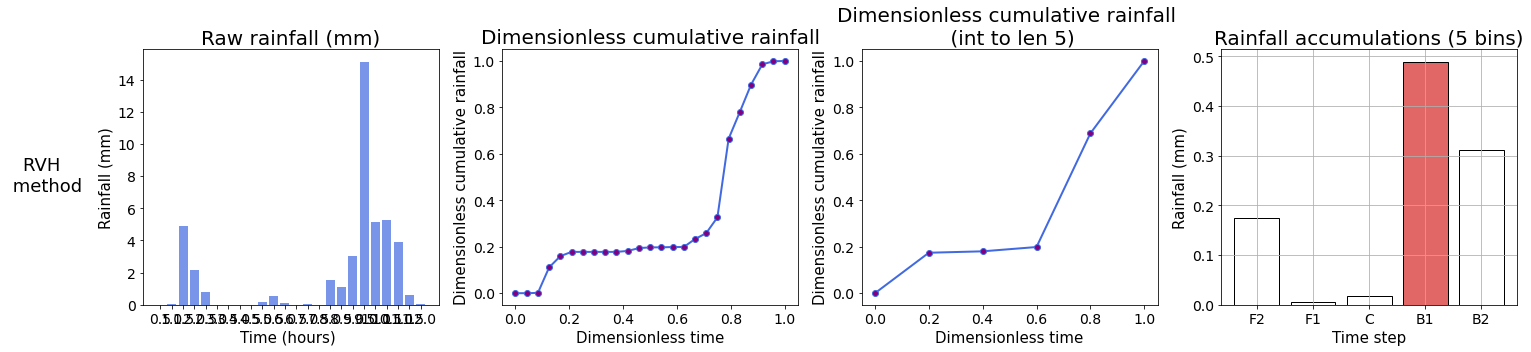

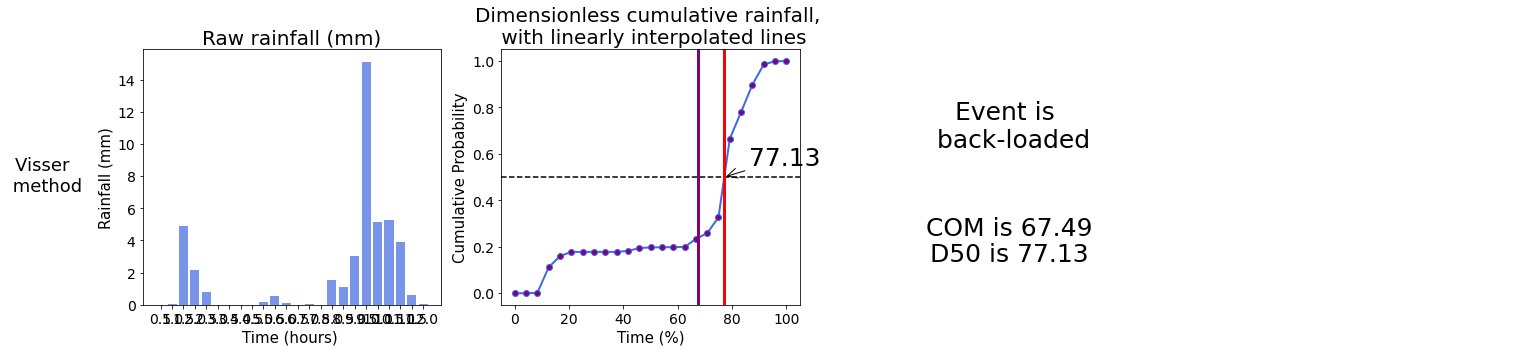

In [16]:
sample_short = pd.read_csv(indy_events_fp + files[20])
sample = sample_short['precipitation (mm)']

fig, axs = plt.subplots(1, 4, figsize=(20, 5))
make_roberto_plot(sample, axs)
fig, axs = plt.subplots(1, 4, figsize=(20, 5))
make_d50_plot(sample, axs)

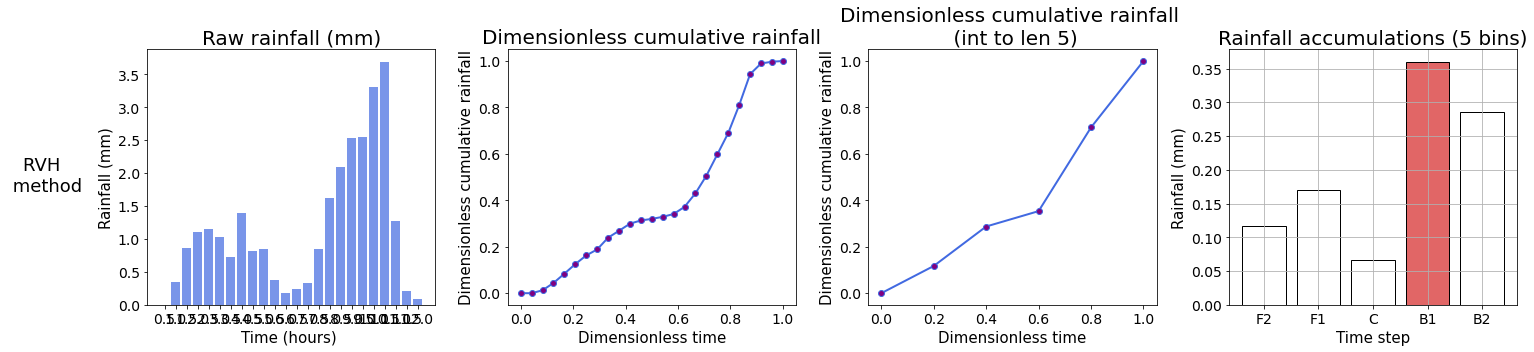

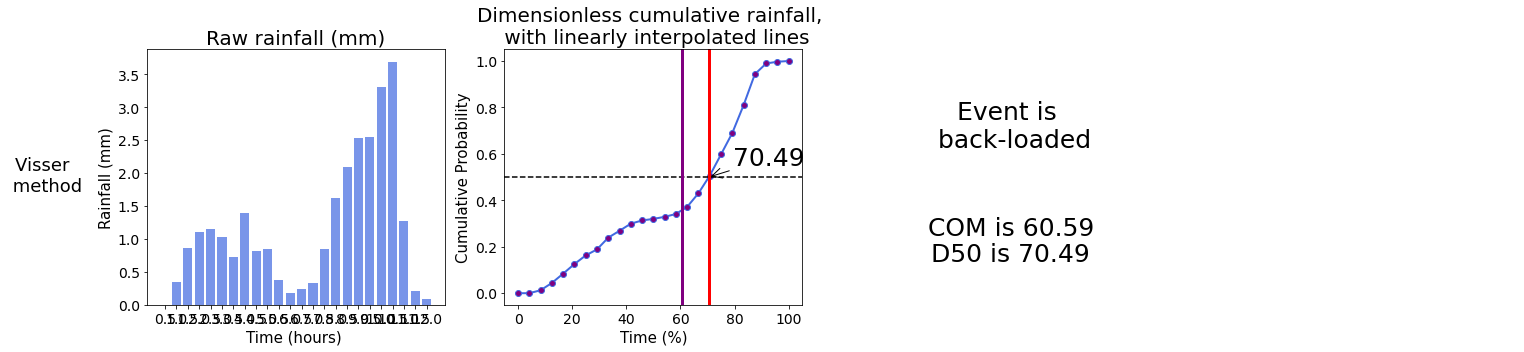

In [17]:
sample_short = pd.read_csv(indy_events_fp + files[30])
sample = sample_short['precipitation (mm)']

fig, axs = plt.subplots(1, 4, figsize=(20, 5))
make_roberto_plot(sample, axs)
fig, axs = plt.subplots(1, 4, figsize=(20, 5))
make_d50_plot(sample, axs)

# Simple model events

In [34]:
event1 = [10,1.4,1.2,1.1,1.6]
event2 = [10,9.8,9.1,8.9,8.8]
event3 = [10,9.8,9.1,1.1, 1.6]
event4 = [50, 2, 2, 2, 2, 2, 2, 2, 2, 2]
event5 = [5, 5, 5, 5, 5, 20, 20, 20, 50]
event6 = [100,1.4,1.2,1.1,1.6]

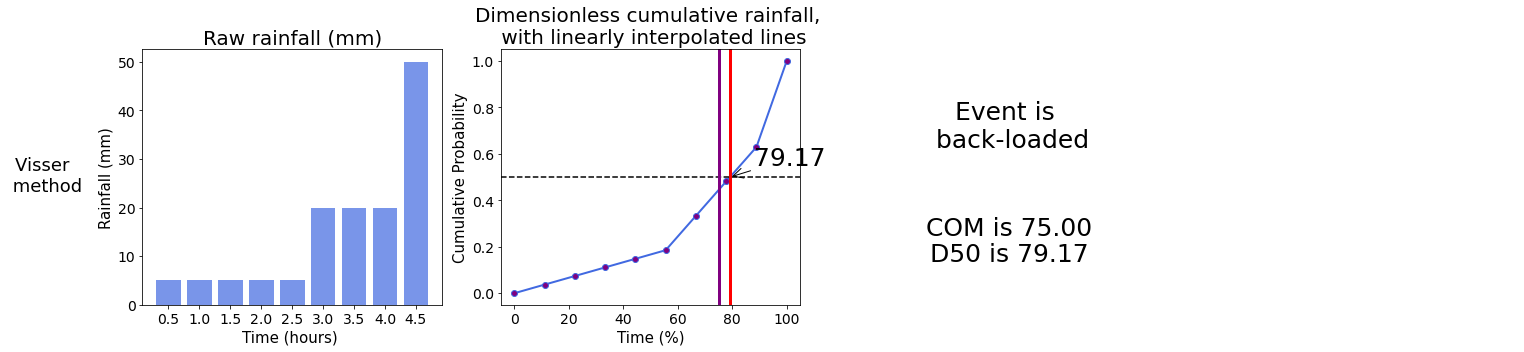

In [23]:
fig, axs = plt.subplots(1, 4, figsize=(20, 5))
make_d50_plot(event5, axs)

In [35]:
event1_df=pd.DataFrame({'times': np.arange(1, len(event1) + 1), 'precipitation (mm)':event1})
event2_df=pd.DataFrame({'times': np.arange(1, len(event2) + 1), 'precipitation (mm)':event2})
event3_df=pd.DataFrame({'times': np.arange(1, len(event3) + 1), 'precipitation (mm)':event3})
event6_df=pd.DataFrame({'times': np.arange(1, len(event6) + 1), 'precipitation (mm)':event6})

In [ ]:
print(round(np.max(event1)/np.mean(event1),1))
print(round(np.max(event2)/np.mean(event2),2))
print(round(np.max(event3)/np.mean(event3),2))

# Higher value means higher inequality
print(gini(event1))
print(gini(event2))
print(gini(event3))

print(calculate_tci(event1, 0.5))
print(calculate_tci(event2, 0.5))
print(calculate_tci(event3, 0.5))

In [ ]:
v = np.array(event2)
bins, result, gini_val = G(v)
print(gini_val)
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(bins, result, label="observed")
plt.plot(bins, bins, '--', label="perfect eq.")
plt.xlabel("fraction of population")
plt.ylabel("fraction of wealth")
plt.title("GINI: %.4f" %(gini_val))
plt.legend()
plt.subplot(2, 1, 2)
plt.hist(v, bins=20)

In [ ]:
def gini(x):
    # (Warning: This is a concise implementation, but it is O(n**2)
    # in time and memory, where n = len(x).  *Don't* pass in huge
    # samples!)

    # Mean absolute difference
    mad = np.abs(np.subtract.outer(x, x)).mean()
    # Relative mean absolute difference
    rmad = mad/np.mean(x)
    # Gini coefficient
    g = 0.5 * rmad
    return g

gini(event3)

In [ ]:
def calculate_tci(rainfall_data, interval_duration):
    """
    Calculate the Temporal Concentration Index (TCI) of a rainfall event.
    
    Parameters:
    rainfall_data (list): A list of rainfall amounts recorded during the event.
    interval_duration (float): Duration of each time interval (in hours).
    
    Returns:
    float: The Temporal Concentration Index.
    """
    total_rainfall = sum(rainfall_data)  # Total rainfall
    total_time = len(rainfall_data) * interval_duration  # Total time based on number of intervals
    weighted_sum = sum(rainfall * interval_duration for rainfall in rainfall_data)  # Weighted sum

    if total_rainfall == 0 or total_time == 0:
        raise ValueError("Total rainfall and total time must be greater than zero.")

    tci = weighted_sum / (total_rainfall * total_time)
    return tci

# Example usage
event1 = [10, 1.4, 1.2, 1.1, 1.6]  # Rainfall amounts in mm
interval_duration = 1.0  # Duration of each interval in hours

tci = calculate_tci(event1, interval_duration)
print(f"Temporal Concentration Index (TCI) for event1: {tci:.4f}")


In [ ]:
rainfall_data